# IRS, Product Variety, and Trade

Here is a presentation and simulation of a model of "Increasing Returns to Scale, monopolistic competition and Trade" based on the Krugman (1979) article by the same name in the *Journal of International Economics* with the following simplifications and adaptations:

- model and graph analysis simplified to be similar to Krugman, Obstfeld, Melitz textbook.
- We use the linear demand setup from Salop, S. (1979)  “Monopolistic Competition with Outside Goods,” *Bell Journal of Economics*


This is a Jupyter notebook with executable Python code for the graphs and simulations. If you want to execute and interact with the content, scroll down to the code cells and run them sequentially.

### Preliminaries

Consider a demand curve of the form:

$$
q_i = A - b \cdot P_i
$$

Its associated inverse demand function will be:

$$
P(q_i) = \frac{A}{b} - \frac{1}{b} \cdot q_i
$$

Total Revenue $TR(q_i) = P(q_i) \cdot q_i$ can be differentiated to find

$$
MR(q_i) = \frac{A}{b} - \frac{2}{b} \cdot q_i =  P - \frac{1}{b} \cdot q_i
$$

and we can find an expression for the gap 

$$
P(q_i) - MR(q_i) = \frac{q_i}{b}
$$

This is also the firm's **markup over marginal cost** $P-MC$ (since $MR=MC$).  

Note the larger is $b$, the more firm sales fall for a given price rise (i.e. the more elastic is demand).

### Firm Technology and Costs

Each firm has exclusive right to produce a unique product (protected by patent or copyright) but competitors can enter the market to supply similar goods. There is a relatively high fixed cost of establishing a production plant and then a simple constant marginal cost:

$$
TC(q_i) = F + c \cdot q_i
$$

hence $MC(q_i) = c$ and average cost is
$$
AC(q_i) = \frac{F}{q_i} + c
$$

### Demand for Product Variety

Consumers demand variety. Products are symmetric substitutes in consumption. Salop (1979) constructs a model with linear demands

Assume symmetric demand for each good. Demand for firm $i$'s good is:

$$
q_i = S \cdot \left [\frac{1}{n} - b \cdot (P_i - \bar{P}) \right ]
$$

Here $S$ is total output in the industry. If firm sets product price $P_i$ equal to price of other similar products $\bar{P}$ then firm will produce $q_i = \frac{S}{n}$ of total output. If it tries to raise $P_i > \bar{P}$ it loses some but not all market share.

Expanding out the earlier inverse demand equation:

$$
q_i = \left [\frac{S}{n} + b\bar{P} \cdot S \right ] - b P S
$$

which we can invert to get an inverse demand curve for each firm.

Monopolistically competitive market with free entry will drive $P=AC$ and hence profits to zero.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

In [2]:
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams["figure.figsize"] = [6,6]
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["font.size"] = 18
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid']=False

In [3]:
A = 100000
b = 1/1000
F = 100*1000
c = 30
S = 1*1000*1000
qmax = 100
nmax = 50
q = np.arange(1,qmax)
n = np.arange(1,nmax)

In [4]:
def p(q, A=A, b = b):
    return A/b - (1/b) * q

def mr(q, A=A, b = b):
    return A/b - (2/b) * q

def AC(q, F=F, c = c):
    return F/q + c

def mc(q, c = c):
    return c*np.ones(len(q))

def cc(n, S=S, F=F, c = c):
    return n*F/S + c

def pp(n, b=b,  c = c):
    return c + 1/(b*n)

In [5]:
def firm(S =S, F=F, c=c):
    qmax = 15000
    ne = np.sqrt(S/(b*F))
    Pe = c + np.sqrt(F/(S*b))
    qe = S/ne
    q = np.arange(1,qmax)
    plt.xlim(0,12000)
    plt.ylim(0,125)
    plt.plot(q, p(q, A=(S/ne+b*S*Pe), b = b*S))
    plt.plot(q, mr(q, A, b), color='b')
    plt.plot(q, mc(q, c))
    plt.xlabel('q')
    plt.ylabel('P, AC')
    
    plt.plot(q, AC(q, F, c))
    plt.scatter(qe,AC(qe,F,c))
    plt.vlines(qe,0,Pe, linestyle=":")
    plt.hlines(Pe,0,qe, linestyle=":");

The following shows a firm in a long-run equilibrium where $P=AC$. The $MR$ curve is not drawn, but it would cross the horizontal marginal cost curve to determine the equilibrium quantity.

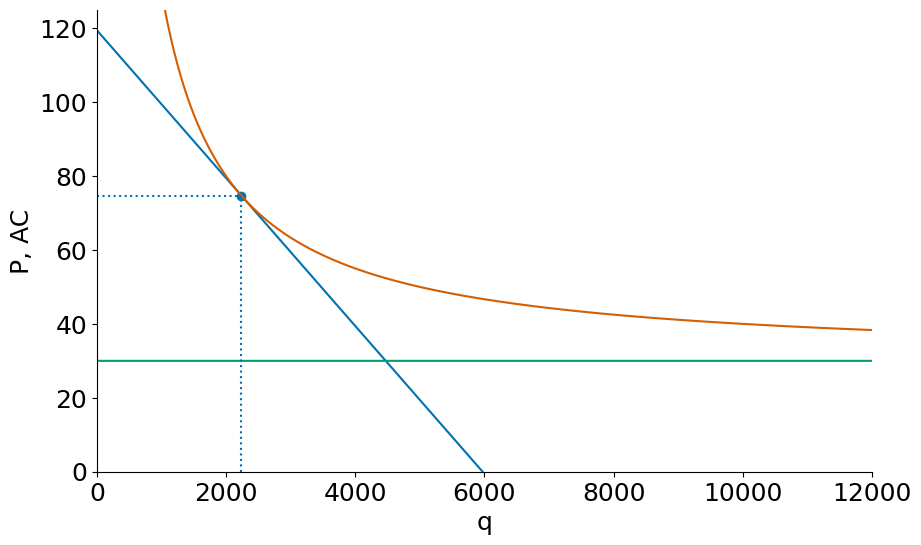

In [6]:
firm(S=S/20, F=F, c=c)

Below we can see the effect of increasing market size. As market size $S$ increases from $S=50{,}000$ to $S=200{,}000$, the demand curve for each firm shifts out and becomes more elastic (flatter). However, any temporary new profits earned will attract new entrants, and we end up at a new equilibrium with a new $P=AC$ further down the firm's $AC$ curve, as shown. 

Hence, closed economy countries with larger market size will have more firms/product variety, lower equilibrium prices, and higher labor productivity (since each firm is further down its average cost curve).

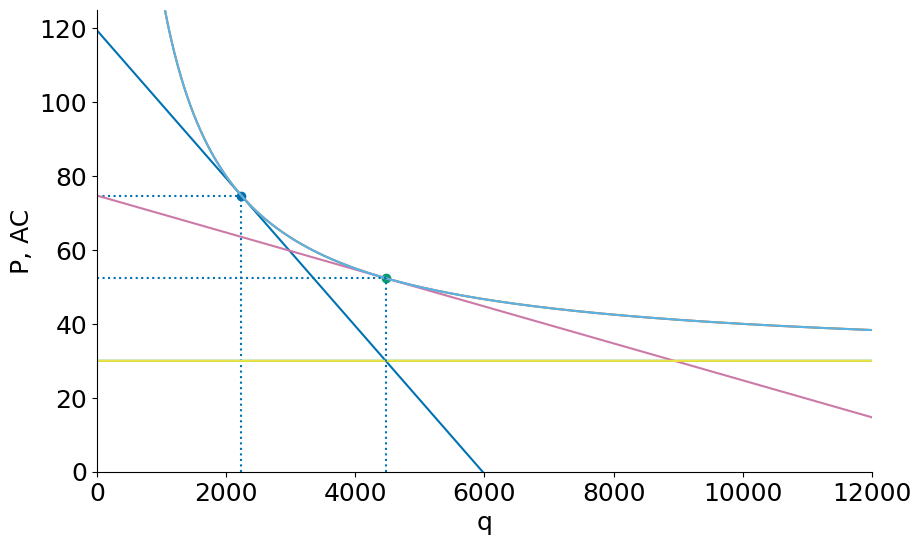

In [7]:
firm(S=50000, F=F, c=c)
firm(S=200000, F=F, c=c)

## Solving for equilibrium $n$ and $\bar P$

In a symmetric equilibrium $P_i = \bar{P}$ then $q_i = q = \frac{S}{n}$ or $S = n \cdot q$

$$
q_i = \left [\frac{S}{n} + b\bar{P} \cdot S \right ] - S b P
$$

### The `cc` curve

Average cost $AC$ rises with the number of firms $n$, because more firms in the same market means lower production runs and higher average fixed costs.

Substituting $q = \frac{S}{n}$ into $AC = \frac{F}{q} + c$:

$$
AC = \frac{nF}{S} + c
$$

Average cost rises with the number of firms $n$ because each firm produces less $\left(\frac{S}{n}\right)$ and so each firm is spreading their fixed costs over fewer units of output.

### The `pp` curve

Price falls with the number of firms $n$ because increased competition reduces markups.

In a symmetric equilibrium firm demand could be written:
$$
q_i = \left [\frac{S}{n} + b\bar{P} \cdot S \right ] - S b P = A' - b' P 
$$

Recall that with a demand curve of form $q_i = A^\prime - b^\prime \cdot P$ we found a markup

$$
P = c + \frac{q}{b^\prime} 
$$

Substituting using $b^\prime = S\cdot b$, and $q=\frac{S}{n}$ we get:

$$
P = c + \frac{1}{b \cdot n}
$$


In [8]:
def mkt_eq(S = S, F=F, c=c):
    nmax = 150
    n = np.arange(1,nmax)
    ne = np.sqrt(S/(b*F))
    Pe = c + np.sqrt(F/(S*b))
    AC = c + ne*F/S
    print(f"n = {ne:2.0f}, P={Pe:3.0f}, q = {S/ne:5.0f}, F/q = {ne*F/S:3.0f}")
    plt.xlim(0,150)
    plt.ylim(0,125)
    plt.xlabel('n')
    plt.ylabel('P, AC')
    plt.plot(n, cc(n, S=S, F=F, c = c), color='b')
    plt.plot(n, pp(n, b=b,  c = c), color='g')
    plt.text(nmax,pp(nmax),"pp")
    ntop = (100-c)*S/F
    plt.text(min(nmax,ntop), cc(min(ntop,nmax),S=S, F=F, c = c), "cc") 
    plt.scatter(ne,Pe)
    plt.hlines(Pe,0,ne,linestyle=":")
    plt.vlines(ne,0,Pe,linestyle=":")

n = 45, P= 52, q =  4472, F/q =  22


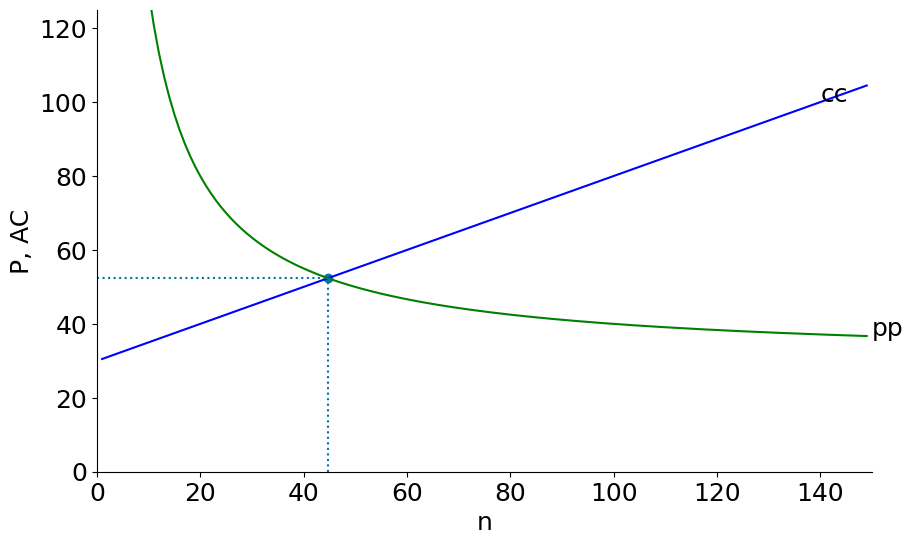

In [9]:
mkt_eq(S=200000, F=F, c=c)

Here we can see the effect of opening to trade (the potential market for each firm now becomes the sum of the country markets $S$). Here we suppose four equal-size countries open up to each other (the graph then becomes a depiction of the integrated world market).  

The result is lower prices and average cost and a higher number of product varieties $n$.

n = 22, P= 75, q =  2236, F/q =  45
n = 45, P= 52, q =  4472, F/q =  22


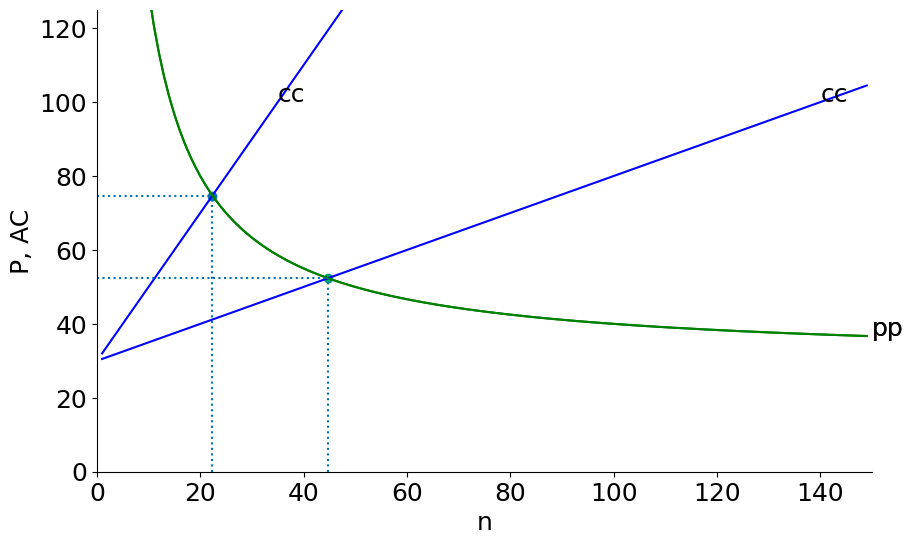

In [10]:
mkt_eq(S=50000, F=F, c=c)
mkt_eq(S=200000, F=F, c=c)

In the example above each country now sells to the entire world market, so the size of each country's market in effect quadruples. The total number of firms (and products) goes from $n=22$ in each country (88 firms in total, but only 22 products) to a world total of $n=45$ firms and products. Each country now has just 11 firms but each of these firms now has much larger production runs ($q=4{,}472$ after opening to trade compared to $q=2{,}236$ in the closed economy). 

The price (and average cost) of each product falls from $75 to $52 and the number of product varieties rises from 22 to 45.

Below, we put the firm-level and market-level graphs side-by-side.

In [11]:
def twopane(S, F, c):
    plt.figure()
    ax = plt.subplot(121)
    firm(S,F,c)
    ax= plt.subplot(122)
    mkt_eq(S,F,c);

Here is the country when closed to trade:

n = 22, P= 75, q =  2236, F/q =  45


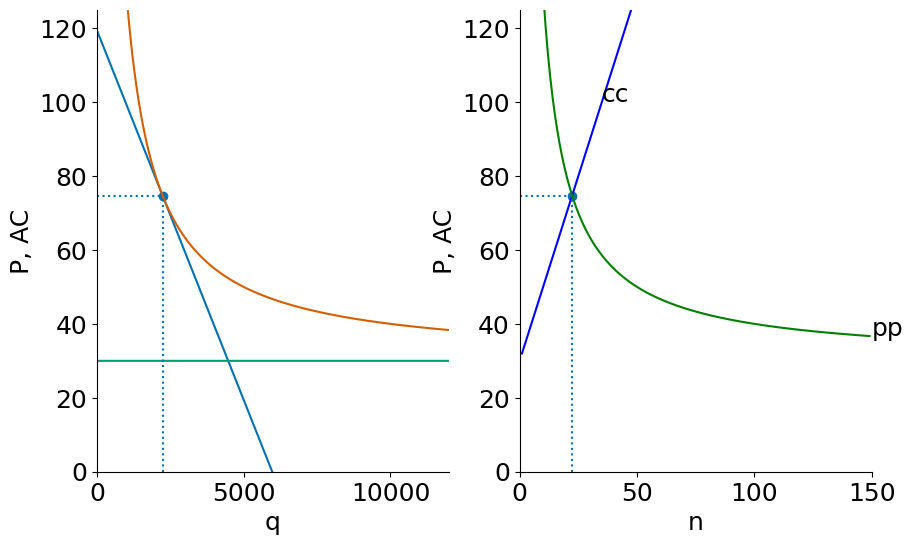

In [12]:
twopane(50000,F,c)

And after the countries open to trade:

n = 100, P= 40, q = 10000, F/q =  10


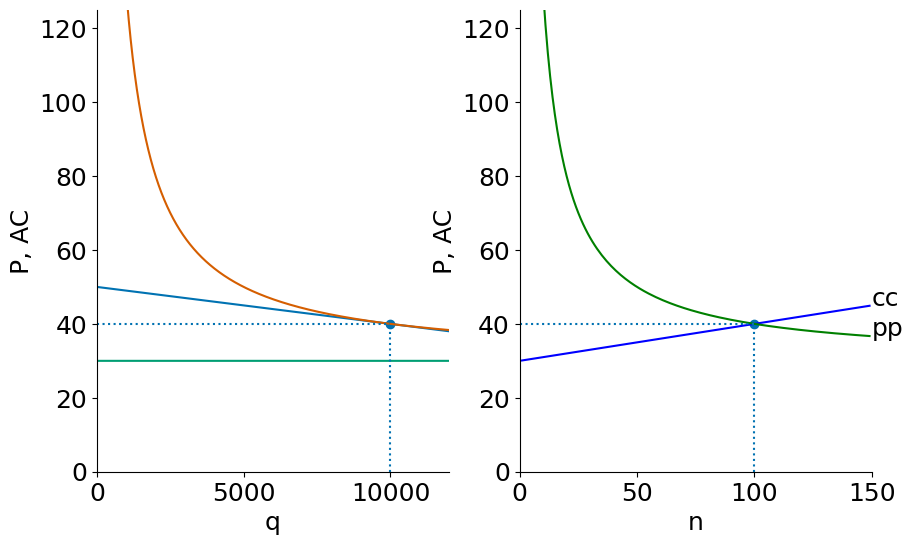

In [13]:
twopane(S,F,c)